### User based similarity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from textblob import TextBlob

# to ignore warnings
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')


In [2]:
new_Arts = pd.read_csv("new_Arts.csv")
new_Arts.head()

,UserID,ProductID,ProductName,rating,tags
0,A2PXVMF9DH8NDZ,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,3.0,not veri sharp like the previou review i wa ve...
1,A1YUL9PCJR3JTY,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.0,nice larg basic safeti pin these are your basi...
2,A2B6I0N8RNAQXJ,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,5.0,great safeti pin these dritz r extra larg safe...
3,A2FMZ7LFWTZCJ4,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.0,when you need a safeti pin we are organ our co...
4,A1AUXDAAZR2VNT,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,1.0,safeti pin as anoth review note these do not p...


### Sentiment Analysis

In [3]:
#sentimental analysis of the text
new_Arts['polarity'] = new_Arts['tags'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_Arts['review_len'] = new_Arts['tags'].apply(lambda x:len(x))
new_Arts['word_count'] = new_Arts['tags'].apply(lambda x: len(x.split()))

In [4]:
new_Arts

,UserID,ProductID,ProductName,rating,tags,polarity,review_len,word_count
0,A2PXVMF9DH8NDZ,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,3.0,not veri sharp like the previou review i wa ve...,-8.392256e-02,508,110
1,A1YUL9PCJR3JTY,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.0,nice larg basic safeti pin these are your basi...,1.435185e-01,629,135
2,A2B6I0N8RNAQXJ,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,5.0,great safeti pin these dritz r extra larg safe...,4.550000e-01,139,27
3,A2FMZ7LFWTZCJ4,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.0,when you need a safeti pin we are organ our co...,0.000000e+00,166,34
4,A1AUXDAAZR2VNT,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,1.0,safeti pin as anoth review note these do not p...,-2.500000e-01,123,26
...,...,...,...,...,...,...,...,...
23952,A360ESH9H7EYHG,B000LFEI2K,"Makin's USA Clay Cutters, Airplane, 3 Per Package",5.0,just as pictur clean cut use the two smallest ...,3.666667e-01,169,31
23953,A2SQI5NLZFGF85,B000G6HRT0,Collins Pin Cushion Strawberry Emery,5.0,work strawberri my straight needl were get to ...,5.551115e-17,224,45
23954,A3DSLYMEG97NOK,B000G6HRT0,Collins Pin Cushion Strawberry Emery,5.0,strawberri emeri thi item arriv promptli and i...,7.000000e-01,141,27
23955,ABYAIU78NKAZL,B000MAPM2O,Jolee's Boutique Themed Ornate Dimensional Sti...,4.0,item wa great i sure paid too much for ship th...,5.000000e-01,162,36


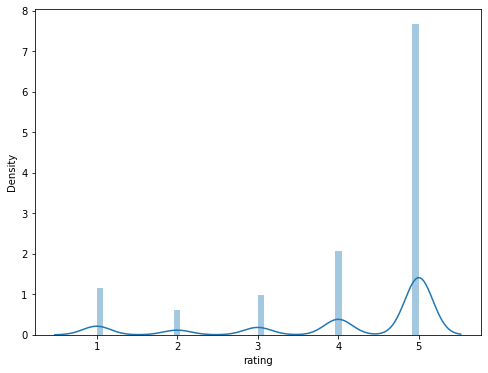

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(new_Arts['rating']);

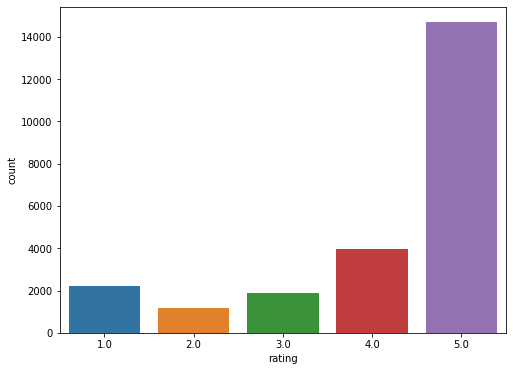

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(new_Arts['rating']);

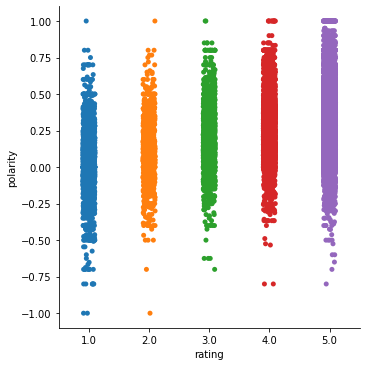

In [7]:
sns.catplot(x='rating', y='polarity', data=new_Arts)

### Creating a pivot table

In [8]:
rating_pivot = pd.pivot_table(new_Arts,values = "rating", index = "UserID", columns = "ProductID").fillna(0)
rating_pivot

ProductID,0618307222,087659223X,0922705380,0930113187,0970113706,1564772829,1574863185,1574864246,1892127180,1929180802,...,B000QHH03W,B000RB1Y5W,B000RB3GI0,B000TB6EHS,B000TBA6EK,B000TC07HK,B000TC3VQY,B000TKQAJQ,B000UYDG1Q,B0017RCLLQ
UserID,,,,,,,,,,,,,,,,,,,,,
A002211213O7OZD4NB6T4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00890531BOEEDK31WCBE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01676021JTRZ0XE5YS4A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03007643BIO3UI6ZO6ZR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03043323VAO4JWT2G7HF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYQ60ZR354HC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYUK4V2OENUZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZ1R8ITZ43KJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
rating_pivot['0618307222'].value_counts()

0.0    20686
5.0        3
4.0        2
3.0        1
1.0        1
Name: 0618307222, dtype: int64

#### sklearn.metrics.pairwise_distances can be used to compute distance between all pairs of users. pairwise_distances() takes a metric parameter for what distance measure to use. Using the cosine similarity for finding similarity among users

In [10]:
# rating_pivot = rating_pivot.to_numpy()
rating_pair = pairwise_distances(rating_pivot, metric = 'cosine')
rating_pair

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [11]:
df = pd.DataFrame(rating_pair)
df

,0,1,2,3,4,5,6,7,8,9,...,20683,20684,20685,20686,20687,20688,20689,20690,20691,20692
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20688,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
20689,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
20690,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
20691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


### Find the 5 most similar user for user with user Id 10

In [ ]:
i = int(input("enter the userid index in the pairwise distance : "))

In [ ]:
top5 = df.loc[i].sort_values(ascending = True)
pd.DataFrame(top5[0:5])

In [ ]:
allusers=rating_pivot.values
user2=allusers[0]    # user1 with userid 'A00890531BOEEDK31WCBE'
den1=np.sqrt(sum([np.square(x) for x in user2]))
cosinesim=[(10,1)]
i=1
for user in allusers[1:]:
    numer=[x*y for x,y in zip(user2,user)]
    den2=np.sqrt(sum([np.square(x) for x in user]))
    costheta = sum(numer)/(den1*den2)
    cosinesim.append((rating_pivot.index[i],costheta))
    i=i+1
cosinesim.sort(key=lambda x:x[1],reverse =True)
simusers=cosinesim[0:6]
simusers

In [ ]:
new_Arts.shape

In [ ]:
user = Arts[Arts['userid']=='A2D1LPEUCTNT8X']
user

In [ ]:
def user_based_model(df):
    print("Sentimental Analysis on the text")
    df['polarity'] = df['tags'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['review_len'] = df['tags'].apply(lambda x:len(x))
    df['word_count'] = df['tags'].apply(lambda x: len(x.split()))
    
    print(df)
    
    plt.figure(figsize=(8,6))
    sns.distplot(df['rating']);
    
    plt.figure(figsize=(8,6))
    sns.countplot(df['rating']);

    sns.catplot(x='rating', y='polarity', data=df)
    
    rating_pivot = pd.pivot_table(df,values = "rating", index = "UserID", columns = "ProductID").fillna(0)
    print(rating_pivot)
    
#     print(rating_pivot['0618307222'].value_counts())
    
    print('Applying cosine similarity')
    rating_pair = pairwise_distances(rating_pivot, metric = 'cosine')
    print(rating_pair)
    
    df1 = pd.DataFrame(rating_pair)
    print(df1)
    
    i = int(input("enter the userid index in the pairwise distance : "))
    
    top5 = df1.loc[i].sort_values(ascending = True)
    print("Printing top 5 values.")
    print(pd.DataFrame(top5[0:5]))
    
    allusers=rating_pivot.values
    user2=allusers[0]    # user1 with userid 'A00890531BOEEDK31WCBE'
    den1=np.sqrt(sum([np.square(x) for x in user2]))
    cosinesim=[(10,1)]
    i=1
    for user in allusers[1:]:
        numer=[x*y for x,y in zip(user2,user)]
        den2=np.sqrt(sum([np.square(x) for x in user]))
        costheta = sum(numer)/(den1*den2)
        cosinesim.append((rating_pivot.index[i],costheta))
        i=i+1
    cosinesim.sort(key=lambda x:x[1],reverse =True)
    simusers=cosinesim[0:6]
    simusers

In [ ]:
new_cell = pd.read_csv('new_cell.csv')
new_cell

In [ ]:
user_based_model(new_cell)

In [ ]:
new_wat = pd.read_csv('new_wat.csv')
user_based_model(new_wat)

In [ ]:
new_Mus = pd.read_csv('new_Mus.csv')
user_based_model(new_Mus)